In [51]:
import pandas as pd
import numpy as np
import seaborn as sns

import cufflinks as cf
# cf.go_offline()

In [35]:
train = pd.read_csv('data/titanic_train.csv')

In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing value 

<AxesSubplot:>

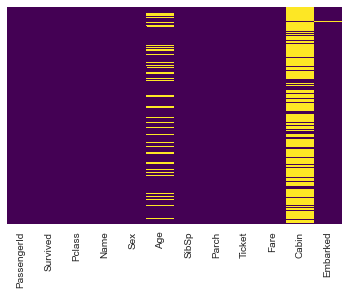

In [37]:
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap= 'viridis')

In [38]:
sns.set_style('whitegrid')

### EDA

<AxesSubplot:xlabel='Survived', ylabel='count'>

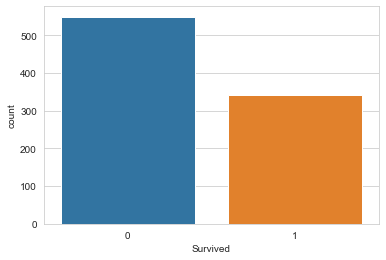

In [39]:
sns.countplot(x='Survived', data =train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

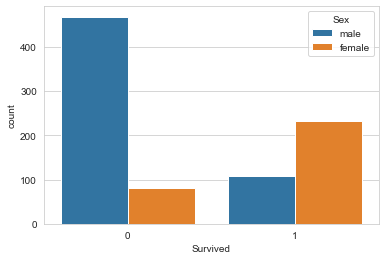

In [40]:
sns.countplot(x='Survived',hue ='Sex', data =train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

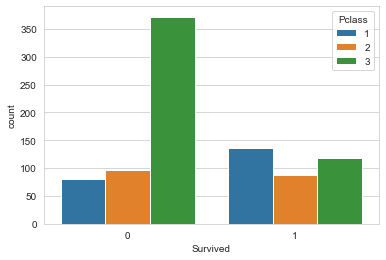

In [41]:
sns.countplot(x='Survived',hue ='Pclass', data =train)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age'>

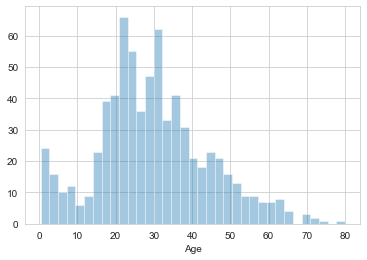

In [42]:
sns.distplot(train['Age'].dropna(), kde = False, bins = 35)

<AxesSubplot:ylabel='Frequency'>

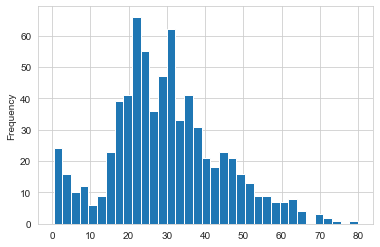

In [43]:
train['Age'].plot.hist(bins=35)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

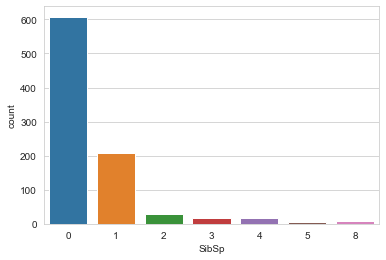

In [44]:
sns.countplot(x = 'SibSp', data = train)

<AxesSubplot:>

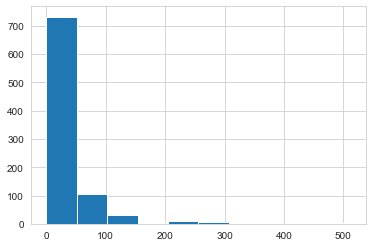

In [45]:
train['Fare'].hist()

In [50]:
import plotly.express as px
fig = px.histogram(train, x="Fare")
fig.show()